## Análise discriminante linear (LDA)

O método LDA é aplicado em 6 passos

1. Cálculo das médias para cada classe
		
2. Obtenção da matriz de dispersão intra-classe

3. Obtenção da matriz de dispersão entre-classe

4. Geração de autovalores e autovetores

5. Seleção dos autovetores com maiores autovalores

6. Projeção dos dados em novo espaço

### Importações

In [1]:
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Abertura e análise exploratória

Observando apenas as representações gráficas simples das características abaixo, já podemos dizer que os comprimentos e larguras (petal lengths e petal widths) das pétalas são provavelmente mais adequados como características potenciais, duas distintas entre as três classes de flores

In [2]:
df = sns.load_dataset("iris")

/home/utfpr/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/utfpr/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/utfpr/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/utfpr/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

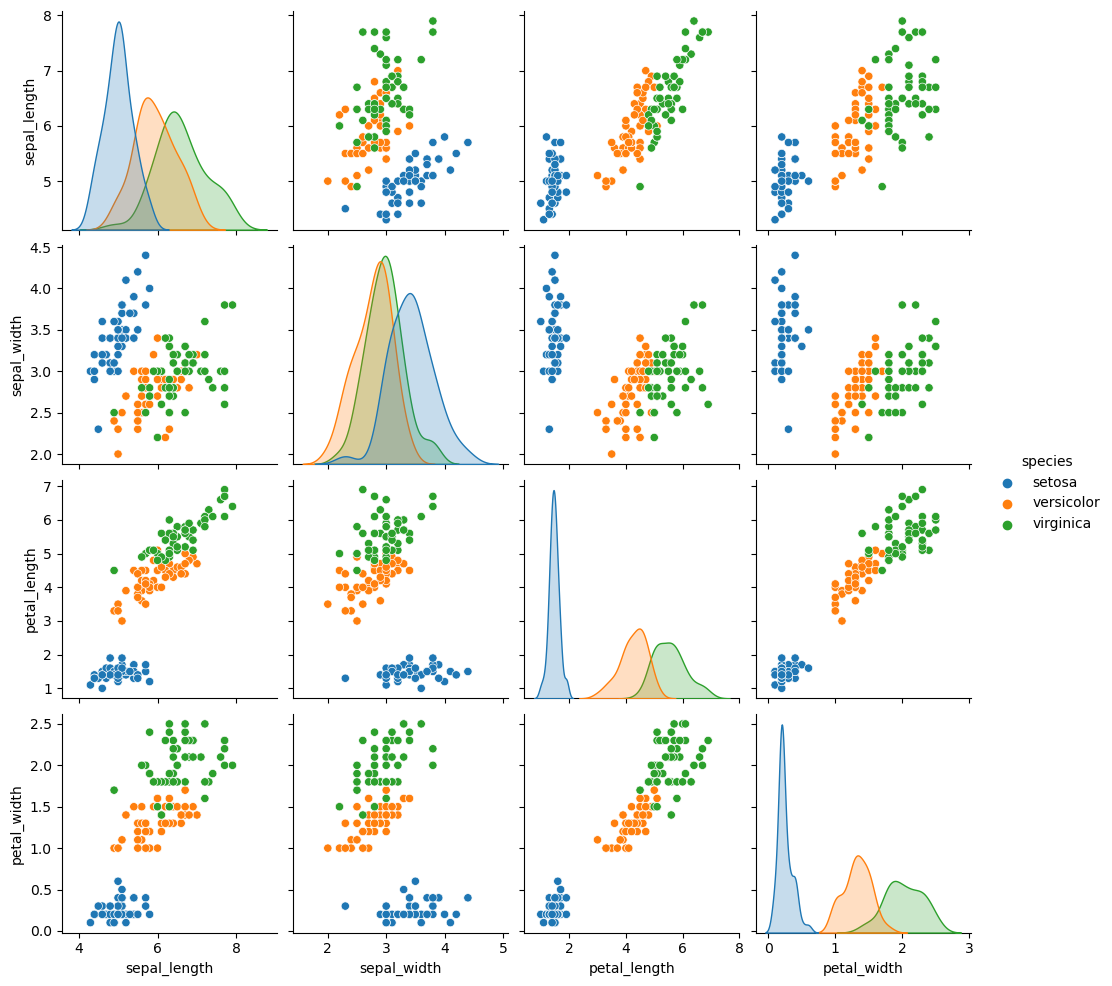

In [3]:
sns.pairplot(df, hue="species")

### Pré-processamento

In [4]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [5]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']].values
y = df['species'].values 

print(y)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'v

In [6]:
enc = LabelEncoder()
enc.fit(y)
y = enc.transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## LDA aplicado em 6 passos

In [7]:
# Centrar os dados na média
X = X - X.mean(axis = 0) 

### 1 - Cálculo das médias para cada classe

$\boldsymbol{\mu}_i = \begin{bmatrix} 
\mu_{\omega_i (\text{sepal length)}}\\ 
\mu_{\omega_i (\text{sepal width})}\\ 
\mu_{\omega_i (\text{petal length)}}\\
\mu_{\omega_i (\text{petal width})}\\
\end{bmatrix} \; , \quad \text{with} \quad i = 1,2,3,4$

In [8]:
mean_vectors = []
for cl in range(0,3):
    mean_vectors.append(np.mean(X[y == cl], axis = 0))
    print('Vetor médio de classes %s: %s\n' %(cl, mean_vectors[cl]))

Vetor médio de classes 0: [-0.83733333  0.37066667 -2.296      -0.95333333]

Vetor médio de classes 1: [ 0.09266667 -0.28733333  0.502       0.12666667]

Vetor médio de classes 2: [ 0.74466667 -0.08333333  1.794       0.82666667]



### 2 - Obtenção da matriz de dispersão intra-classe

$S_W = \sum\limits_{i=1}^{c}  S_i$

onde
$S_i = \sum\limits_{\pmb x \in D_i}^n (\pmb x - \pmb \mu_i)\;(\pmb x - \pmb \mu_i)^T$  
(scatter matrix for every class) 

e $\pmb \mu_i$ é o vetor de médias    
$\pmb \mu_i = \frac{1}{n_i} \sum\limits_{\pmb x \in D_i}^n \; \pmb x_k$

In [9]:
S_W = np.zeros((4, 4))
for cl,mv in zip(range(0, 3), mean_vectors):
    class_sc_mat = np.zeros((4, 4))                  # matriz de dispersão para doas as classe
    for row in X[y == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # vetores de coluna
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             
print('Matriz de dispersão intra-classe:\n', S_W)

Matriz de dispersão intra-classe:
 [[38.9562 13.63   24.6246  5.645 ]
 [13.63   16.962   8.1208  4.8084]
 [24.6246  8.1208 27.2226  6.2718]
 [ 5.645   4.8084  6.2718  6.1566]]


### 3 - Obtenção da matriz de dispersão entre-classe

$S_B =  \sum\limits_{i=1}^{c} N_{i} (\pmb \mu_i - \pmb \mu) (\pmb \mu_i - \pmb \mu)^T$

onde  
 $\pmb \mu$ é a média geral e $\pmb \mu_{i}$ e $N_{i}$ são a média amostral e os tamanhos das respectivas classes.

In [10]:
overall_mean = np.mean(X, axis = 0)

S_B = np.zeros((4, 4))

for i, mean_vec in enumerate(mean_vectors):  
    n = X[y == i, :].shape[0]
    mean_vec = mean_vec.reshape(4, 1)
    overall_mean = overall_mean.reshape(4, 1)
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    
print('Matriz de dispersão entre-classe:\n', S_B)

Matriz de dispersão entre-classe:
 [[ 63.21213333 -19.95266667 165.2484      71.27933333]
 [-19.95266667  11.34493333 -57.2396     -22.93266667]
 [165.2484     -57.2396     437.1028     186.774     ]
 [ 71.27933333 -22.93266667 186.774       80.41333333]]


### 4 - Geração de autovalores e autovetores

Resolver: $S_{W}^{-1}S_B$

In [11]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):  
    print('\Autovetor {}: \n{}'.format(i + 1, eig_vecs[:, i].real))
    print('autovalor {:}: {:.2e}'.format(i + 1, eig_vals[i].real))

\Autovetor 1: 
[ 0.20874182  0.38620369 -0.55401172 -0.7073504 ]
autovalor 1: 3.22e+01
\Autovetor 2: 
[-0.00653196 -0.58661055  0.25256154 -0.76945309]
autovalor 2: 2.85e-01
\Autovetor 3: 
[-0.78781669  0.41263512  0.42449253 -0.16995062]
autovalor 3: -2.12e-15
\Autovetor 4: 
[-0.09220697 -0.30444114 -0.37675198  0.86998357]
autovalor 4: 5.59e-15


### 5 - Seleção dos autovetores com maiores autovalores

In [12]:
idx = np.argsort(np.abs(eig_vals))[::-1]
eig_vecs = eig_vecs[:, idx]

In [13]:
k = 2 # Seleção dos k maiores autovetores
W = eig_vecs[:, : k]

print(W)

[[ 0.20874182 -0.00653196]
 [ 0.38620369 -0.58661055]
 [-0.55401172  0.25256154]
 [-0.7073504  -0.76945309]]


### 6 - Projeção dos dados em novo espaço

In [14]:
X_lda = X.dot(W)
np.shape(X_lda)

(150, 2)

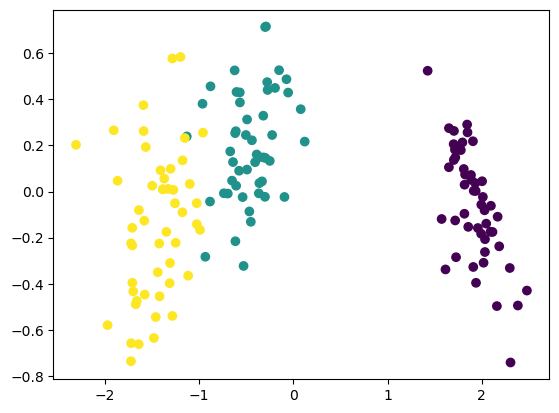

In [15]:
plt.scatter(X_lda[:, 0], X_lda[:, 1], c = y, cmap = 'viridis')

## LDA via scikit-learn

In [16]:
lda = LinearDiscriminantAnalysis(n_components = 2)
lda.fit(X, y)
X_lda = lda.transform(X)

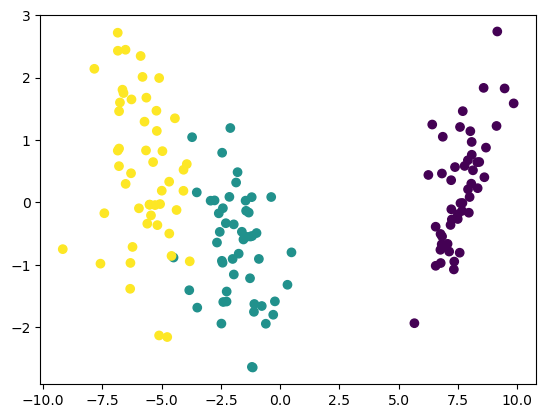

In [17]:
plt.scatter(X_lda[:, 0], X_lda[:, 1], c = y, cmap = 'viridis')

## Classificação com LDA

In [18]:
data = load_iris()
X = data.data   # atributos
y = data.target # classes

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [20]:
model = LinearDiscriminantAnalysis() 
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [21]:
y_pred = model.predict(X_test)

In [22]:
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo LDA: {acc:.2f}")

Acurácia do modelo LDA: 0.96
